# Prediccion-mediante-SVM-KNN-y-Redes-neuronales

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
sns.set()
import datetime

### Carga de data

In [2]:
data = pd.read_csv('AAPL.csv')
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-08,99.300003,99.309998,98.050003,98.360001,90.254837,46356700
2014-09-09,99.080002,103.080002,96.139999,97.989998,89.915321,189846300
2014-09-10,98.010002,101.110001,97.760002,101.000000,92.677299,100869600
2014-09-11,100.410004,101.440002,99.620003,101.430000,93.071877,62353100
2014-09-12,101.209999,102.190002,101.080002,101.660004,93.282913,62626100


In [3]:
data_eng = data.loc[:, ['Adj Close', 'Volume']]
data_eng['HL_PCT'] = (data['High'] - data['Low']) / data['Close'] * 100.0
data_eng['PCT_change'] = (data['Close'] - data['Open']) / data['Open'] * 100

print(data_eng.describe())
print('')
print(data_eng.info())

         Adj Close        Volume       HL_PCT   PCT_change
count  1259.000000  1.259000e+03  1259.000000  1259.000000
mean    140.215952  3.773296e+07     1.774173     0.035108
std      39.185036  1.906706e+07     1.059006     1.218661
min      85.651482  1.136200e+07     0.438208    -6.633069
25%     105.438500  2.469435e+07     1.091372    -0.622460
50%     133.950165  3.278940e+07     1.533099     0.066668
75%     171.327927  4.582280e+07     2.169529     0.710884
max     228.523819  1.898463e+08    16.291701     8.696110

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2014-09-08 to 2019-09-06
Data columns (total 4 columns):
Adj Close     1259 non-null float64
Volume        1259 non-null int64
HL_PCT        1259 non-null float64
PCT_change    1259 non-null float64
dtypes: float64(3), int64(1)
memory usage: 44.3+ KB
None


### Preprocesamiento

In [4]:
# data de validacion
n_valid = int(math.ceil(0.3 * len(data_eng)))

X_data = data_eng.drop(['Adj Close'], 1)
y_data = data_eng['Adj Close']

# Normalizacion
X_data = preprocessing.scale(X_data)

#Separacion data de entrenamiento y validacion
X_train = X_data[:-n_valid]
X_valid = X_data[-n_valid:]

y_train = np.array(y_data[:-n_valid])
y_valid = np.array(y_data[-n_valid:])

In [5]:
y_valid

array([172.960373, 175.931992, 177.632843, 175.922211, 174.42662 ,
       174.631882, 174.016083, 171.357239, 171.298615, 167.417892,
       165.052322, 161.23027 , 168.884155, 164.553802, 162.735626,
       164.006378, 162.931122, 164.602676, 167.750244, 168.913483,
       164.592911, 166.225342, 169.353378, 168.561569, 170.223358,
       170.800049, 171.865585, 174.231125, 173.840134, 168.913483,
       161.992706, 161.523514, 159.275253, 159.969269, 160.526474,
       158.669205, 161.543045, 165.296692, 172.598679, 172.911484,
       179.695419, 180.995468, 181.865463, 183.145996, 185.765717,
       185.059204, 184.627441, 182.949463, 184.65686 , 183.489166,
       182.821884, 184.117172, 183.655975, 184.833527, 184.627441,
       185.049393, 184.382111, 183.989609, 183.371399, 186.678314,
       188.238571, 189.690826, 190.348297, 189.838028, 188.110962,
       187.64978 , 188.680099, 187.129684, 187.227844, 185.304504,
       185.20639 , 182.213486, 183.008331, 181.987808, 181.457

# Modelos

### SVR

In [6]:
from sklearn import svm

In [7]:
clf = svm.SVR()

In [8]:
clf.fit(X_train, y_train) 

c:\users\alee moraga\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
ySVR = clf.predict(X_valid)

In [10]:
ySVR

array([125.54538556, 116.38861846, 117.42751908, 110.31516662,
       117.33585338, 127.33099387, 113.34346041, 110.21532377,
       131.15584399, 109.26906373, 105.05843818, 106.83267232,
       108.26467648, 109.07233713, 104.55818002, 105.45907272,
       105.90502754, 112.25183778, 109.54499194, 122.76320685,
       108.40409058, 115.52579142, 119.90701121, 127.13035578,
       127.44214713, 125.36154974, 129.76437561, 121.37665277,
       130.00739686, 112.58856467, 106.03268731, 110.87669168,
       107.99035383, 117.10664106, 120.26555115, 108.46067152,
       107.20576682, 105.59764098, 103.93068644, 112.71010255,
       106.285797  , 106.93396896, 120.27722473, 126.90260657,
       119.85006367, 122.06542824, 130.25460947, 127.23717416,
       127.36952142, 129.90271983, 132.13387896, 130.79952483,
       132.42835574, 126.2174183 , 125.10321041, 132.88392046,
       128.72805764, 132.91181772, 122.93877239, 124.01646638,
       124.49598895, 130.27700379, 129.66553038, 129.71

### Regresión de vecinos más cercanos

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [13]:
yKNN = knn_model.predict(X_valid)

In [14]:
yKNN

array([154.0314788, 113.4116852, 126.4298236, 134.4057312, 126.5902176,
       127.5442794, 107.86514  , 119.6902894, 149.2744508, 116.1881914,
       103.2653458, 128.5496352, 118.2425384, 144.306781 , 100.2416136,
       100.804016 , 101.505191 , 128.696776 , 103.4729034, 103.9660982,
       125.5681566, 123.4149264, 106.5625138, 125.182045 , 128.813866 ,
       119.8374832, 144.2088316, 128.7842758, 148.7619018, 128.0574296,
       104.5376298, 115.023915 , 148.0016326, 131.5229584, 104.8524202,
       118.5068864, 121.3883272, 116.176541 , 102.4385436, 124.9596678,
       114.1313828, 112.0218826, 148.6609956, 113.4992648, 128.1510756,
       120.6064438, 143.9417144, 122.8473466, 151.4881562, 143.7274582,
       147.05419  , 145.2847196, 123.3506654, 146.8059052, 146.4827714,
       149.3061492, 121.3322736, 130.0054764, 129.3046768, 140.9231246,
       110.2559984, 125.1811904, 147.3813354, 129.7467162, 108.3426638,
       143.6660496, 145.4895416, 150.4470582, 137.5287202, 108.5

### Redes neuronales

In [15]:
from sklearn.neural_network import MLPRegressor

In [16]:
reg = MLPRegressor(hidden_layer_sizes=(100,100,100),  activation='relu', solver='adam',    alpha=0.0001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

In [17]:
reg = reg.fit(X_train, y_train)

In [18]:
yRN = reg.predict(X_valid)

In [19]:
yRN

array([134.77294082, 124.77120064, 121.42597851, 130.81429106,
       127.00148499, 134.83618162, 118.16212347, 125.3322151 ,
       140.25073166, 125.3161931 , 114.33606876, 126.92823048,
       138.99298529, 146.78909174, 116.13960741, 116.82129223,
       116.97894204, 125.57088695, 156.96869719, 127.08099438,
       128.33341097, 126.12090136, 125.39896988, 135.6545045 ,
       134.02578885, 130.32991108, 135.32907762, 132.11270742,
       138.23248658, 117.66222475, 114.09983862, 117.68442968,
       134.91919084, 128.38214915, 126.43237292, 122.27546116,
       123.38653156, 109.11375618, 106.19214302, 119.47758681,
       116.95719983, 113.6310939 , 126.53283672, 133.58572588,
       131.74902804, 131.01289884, 137.90659863, 132.98507113,
       144.77224558, 145.86668795, 142.33058317, 143.61937289,
       148.29744438, 143.33292972, 135.85046908, 144.54101106,
       134.24141554, 140.33718763, 127.00375323, 138.39000383,
       127.53843986, 135.30306649, 137.82003506, 137.11

# Comparacion de modelos

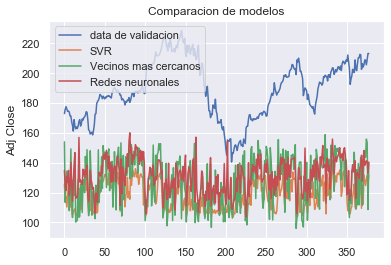

In [20]:
fig, ax = plt.subplots()

ax.set_title('Comparacion de modelos')
ax.set_ylabel('Adj Close')

ax.plot(y_valid, label="data de validacion")
ax.plot(ySVR, label="SVR")
ax.plot(yKNN, label="Vecinos mas cercanos")
ax.plot(yRN, label="Redes neuronales")
plt.legend()

plt.show()